In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\umut3\PycharmProjects\UCB\Ads_CTR_Optimisation.csv')

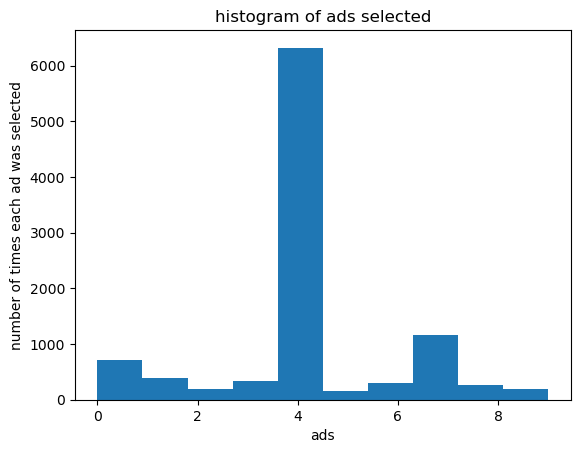

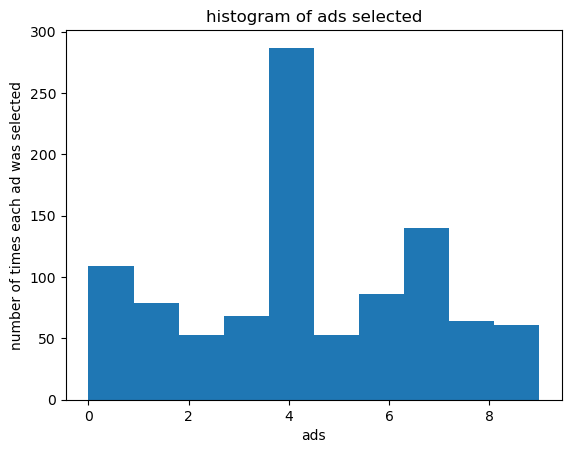

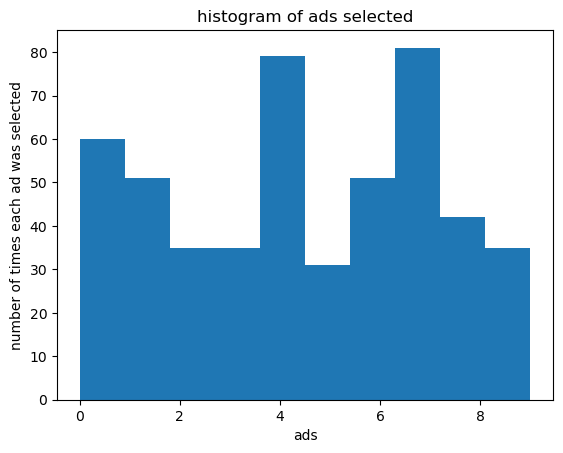

In [2]:
Ns = [10000, 1000, 500]
for a in Ns:
    N = a
    d = 10
    ads_selected = []
    numbers_of_selections = [0] * d
    sums_of_rewards = [0] * d
    total_reward = 0

    for n in range(0, N):
        ad = 0
        max_upper_bound = 0
        for i in range(0, d):
            if numbers_of_selections[i] > 0:
                average_reward = sums_of_rewards[i] / numbers_of_selections[i]
                delta_i = math.sqrt(3*math.log(n+1)/(2*numbers_of_selections[i]))
                upper_bound = average_reward + delta_i
            else:
                upper_bound = 1e400
            if upper_bound > max_upper_bound:
                max_upper_bound = upper_bound
                ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = df.values[n, ad]
        sums_of_rewards[ad] += reward
        total_reward += reward

    plt.hist(ads_selected) # we can change the N and find the optimal value
    plt.title('histogram of ads selected')
    plt.xlabel('ads')
    plt.ylabel('number of times each ad was selected')
    plt.show() # when the N value equals to 500 its hard to determine the optimal ad